<a href="https://colab.research.google.com/github/jotika04/Sem5-s1/blob/main/prediction%20and%20precision%20data%20with%20decision%20tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Breakout Room #4
1.   Alifio Rasyid
2.   Fauzan Athallah
3.   Elizabeth Chan
4.   Jotika
5.   Jennifer Ihdata
6.   Gadiza Pribadi





In [ ]:
import pandas as pd

df=pd.read_csv('train.csv')

In [ ]:
# Imputations
dfmode = df.mode()
dfcopy = df.fillna(value=dfmode.iloc[0])
# dfcopy = df.dropna()

# Transform categorical data -> numerical
dfcopy["Gender"] = dfcopy["Gender"].astype('category')
dfcopy["Gender_cat"] = dfcopy["Gender"].cat.codes

dfcopy.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_cat
0,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,1
1,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,1
2,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,0
3,6,Female,24,1,33,0,< 1 Year,Yes,2630,160,176,0,0
4,7,Male,23,1,11,0,< 1 Year,Yes,23367,152,249,0,1


In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

In [ ]:
predictors = ['Age', 'Gender_cat', 'Previously_Insured']

x = dfcopy.loc[:, predictors].values # Store predictors values on variable x
y = dfcopy.loc[:, ['Response']].values # Store label values on variable y

In [ ]:
from sklearn import model_selection

# Split x and y to train & test sets.
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y,test_size=0.3, random_state=100)

In [ ]:
clf = clf.fit(x_train, y_train) # Train model

y_pred = clf.predict(x_test)

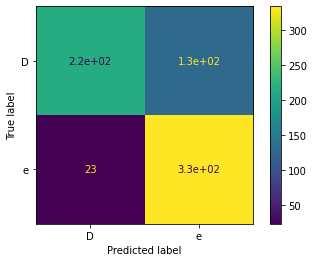

In [ ]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels='Decision Tree').plot()

In [ ]:
# CLASSIFICATION REPORT
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.62      0.74       345
           1       0.72      0.94      0.81       357

    accuracy                           0.78       702
   macro avg       0.81      0.78      0.78       702
weighted avg       0.81      0.78      0.78       702



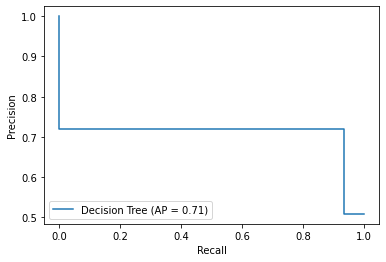

In [ ]:
# PLOTTING PRECISION-RECALL CURVE
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, thresholds = precision_recall_curve(y_test, y_pred, pos_label=clf.classes_[1])
average_prec = average_precision_score(y_test, y_pred)

pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision=average_prec, estimator_name='Decision Tree').plot()

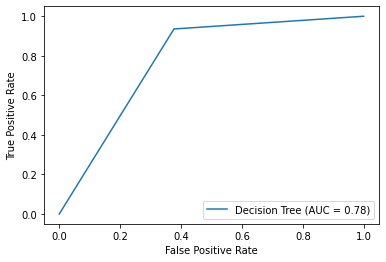

In [ ]:
# PLOTTING ROC CURVE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=clf.classes_[1])
auc = roc_auc_score(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Decision Tree').plot()